**Notice**: this notebook has been used to write the code easily. The notebook has then been converted into a python file that has then been executed on an aws ec2 machine.

In [1]:
import sys
sys.path.insert(0, '../src')

from environment import Environment
from integersolution import integer_solution
from utils import *

from itertools import zip_longest
import time
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
mpl.rcParams["figure.facecolor"] = "white" # set to white the background behind axes and labels
mpl.rcParams["font.size"] = 18

PLT_W = 7
PLT_H = 12

In [4]:
# to save variables on file along to way
# (Notice: the calculations are sometimes very long. We should minimize the risk of losing information)
SAVE_FOLDER = "./saved_results/hotel_example_aws/"
import os
os.makedirs(SAVE_FOLDER, exist_ok=True)

# the base modules
module = "battle_creekhs_1"

# the number of time datapoints to get for each environment, to later compute the avg computation time
TIME_SAMPLES_SIZE = 50

# Get the distance matrix of the module once and for all
# matrices is the array of the base matrices to pass to configure the environments
matrices = [get_building_matrix(module)]

# Varying number of modules
Fixed connection distance at = 20  
Fixed number of robots at 10

In [6]:
mod_connection_distance = 20
mod_m = 10

In [7]:
# define all the cases to analyze
mod_step=2
mod_R=list(range(10,101,mod_step))

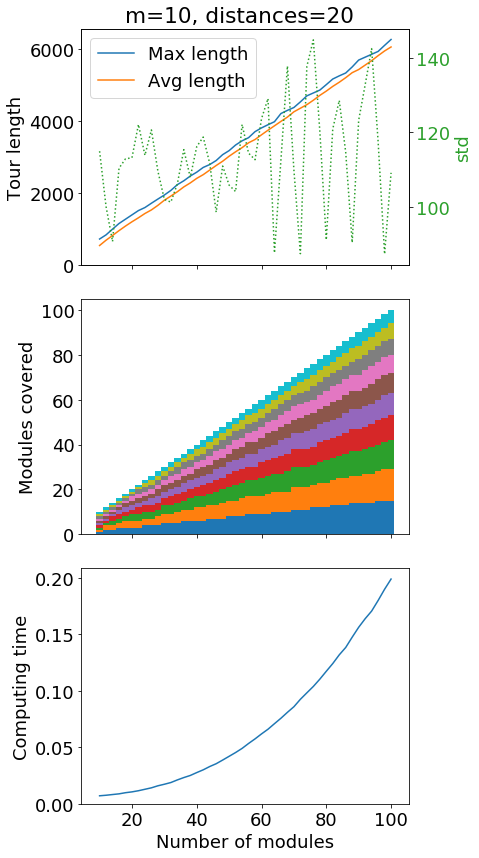

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
fig.set_size_inches(PLT_W, PLT_H)
fig.suptitle("m=" + str(mod_m) + ", distances=" + str(mod_connection_distance), y=1)

#### Makespan plot ####
ax1.set_ylabel('Tour length')
max_plot, = ax1.plot(mod_R, mod_max_len)
avg_plot, = ax1.plot(mod_R, mod_avg_len)
ax1.set_ylim(bottom=0)

ax1.legend((max_plot, avg_plot), ("Max length", "Avg length"))

ax1b = ax1.twinx() 

color = 'tab:green'
ax1b.set_ylabel('std', color=color)
ax1b.plot(mod_R, mod_std_len, ':', color=color)
ax1b.tick_params(axis='y', labelcolor=color)
#### End makespan plot ####


#### Modules covered plot ####
ax2.set_ylabel('Modules covered')

top = np.zeros(len(mod_modules_visited))

modules_covered_list = list(zip_longest(*mod_modules_visited, fillvalue=0))

for n in modules_covered_list:
    ax2.bar(mod_R, n, bottom=top, width=mod_step, alpha=1)
    top += n
#### End modules covered plot ####


#### Runtime plot ####
ax3.set_ylabel('Computing time')
ax3.set_xlabel('Number of modules')
ax3.plot(mod_R, mod_time_avg)
ax3.set_ylim(bottom=0)
#### End runtime plot ####

fig.tight_layout()
fig.savefig(SAVE_FOLDER+"varying_N_together.pdf", dpi=200, bbox_inches='tight', pad_inches=0.1)

# Varying number of robots
Fixed connection distance  
Fixed number of modules

In [9]:
rob_connection_distance = 20
rob_number_of_modules = 30

In [10]:
# define all the cases to analyze
rob_step=1
rob_R=list(range(1,rob_number_of_modules+1,rob_step))

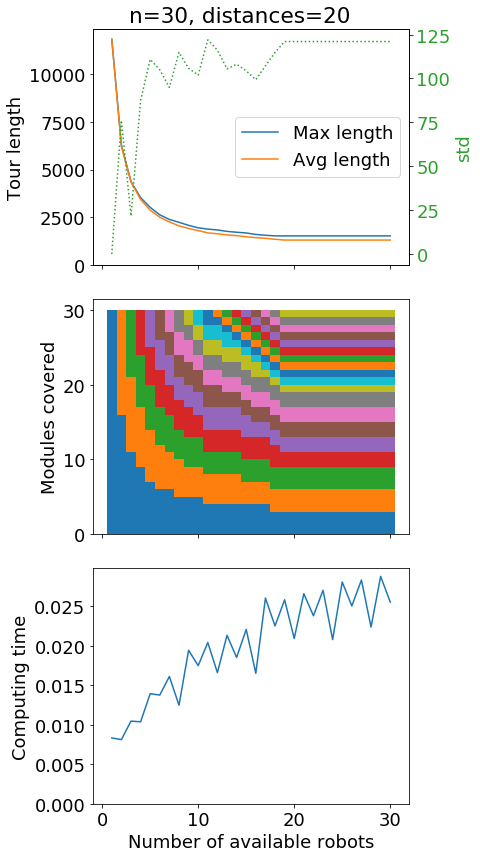

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True)
fig.set_size_inches(PLT_W, PLT_H)
fig.suptitle("n=" + str(rob_number_of_modules) + ", distances=" + str(rob_connection_distance), y=1)

#### Makespan plot ####
ax1.set_ylabel('Tour length')
max_plot, = ax1.plot(rob_R, rob_max_len)
avg_plot, = ax1.plot(rob_R, rob_avg_len)
ax1.set_ylim(bottom=0)

ax1.legend((max_plot, avg_plot), ("Max length", "Avg length"), loc="center right")

ax1b = ax1.twinx() 

color = 'tab:green'
ax1b.set_ylabel('std', color=color)
ax1b.plot(rob_R, rob_std_len, ':', color=color)
ax1b.tick_params(axis='y', labelcolor=color)
#### End makespan plot ####


#### Modules covered plot ####
ax2.set_ylabel('Modules covered')
ax2.set_ylim(top=rob_number_of_modules*1.05)

top = np.zeros(len(rob_modules_visited))

modules_covered_list = list(zip_longest(*rob_modules_visited, fillvalue=0))

for n in modules_covered_list:
    ax2.bar(rob_R, n, bottom=top, width=rob_step)
    top += n
#### End modules covered plot ####


#### Runtime plot ####
ax3.set_ylabel('Computing time')
ax3.set_xlabel('Number of available robots')
ax3.plot(rob_R, rob_time_avg)
ax3.set_ylim(bottom=0)
#### End Runtime plot ####

fig.tight_layout()
fig.savefig(SAVE_FOLDER+"varying_m_together.pdf", dpi=200, bbox_inches='tight', pad_inches=0.1)

# Varying distance between doorways
Fixed number of robots = 10  
Fixed number of modules at 40

In [12]:
dist_m = 10
dist_number_of_modules = 40

In [13]:
# define all the cases to analyze
dist_step=2
dist_R=list(range(0,51,dist_step))

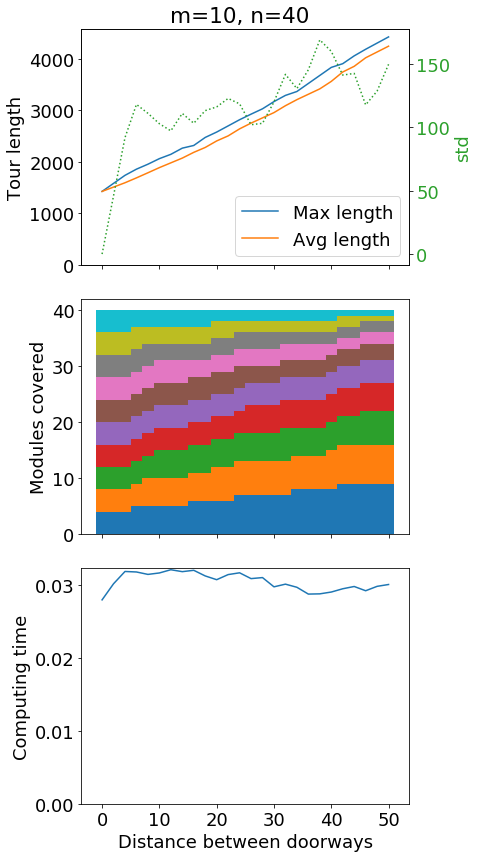

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,sharex=True)
fig.set_size_inches(PLT_W, PLT_H)
fig.suptitle("m=" + str(dist_m) + ", n=" + str(dist_number_of_modules), y=1)

#### Makespan plot ####
ax1.set_ylabel('Tour length')
max_plot, = ax1.plot(dist_R, dist_max_len)
avg_plot, = ax1.plot(dist_R, dist_avg_len)
ax1.set_ylim(bottom=0)

ax1.legend((max_plot, avg_plot), ("Max length", "Avg length"), loc="lower right")

ax1b = ax1.twinx() 

color = 'tab:green'
ax1b.set_ylabel('std', color=color)
ax1b.plot(dist_R, dist_std_len, ':', color=color)
ax1b.tick_params(axis='y', labelcolor=color)
#### End makespan plot ####


#### Modules covered plot ####
ax2.set_ylabel('Modules covered')

top = np.zeros(len(dist_modules_visited))

modules_covered_list = list(zip_longest(*dist_modules_visited, fillvalue=0))

for n in modules_covered_list:
    ax2.bar(dist_R, n, bottom=top, width=dist_step)
    top += n
#### End modules covered plot ####


#### Runtime plot ####
ax3.set_ylabel('Computing time')
ax3.set_xlabel('Distance between doorways')
ax3.plot(dist_R, dist_time_avg)
ax3.set_ylim(bottom=0)
#### End runtime plot ####

fig.tight_layout()

fig.savefig(SAVE_FOLDER+"varying_dist_together.pdf", dpi=200, bbox_inches='tight', pad_inches=0.1)

In [5]:
(mod_modules_visited, mod_max_len, mod_avg_len, mod_std_len, mod_time, mod_time_avg) = load_variables("mod_variables.dump", folder="./saved_results/hotel_example_aws/")
(rob_modules_visited, rob_max_len, rob_avg_len, rob_std_len, rob_time, rob_time_avg) = load_variables("rob_variables.dump", folder="./saved_results/hotel_example_aws/")
(dist_modules_visited, dist_max_len, dist_avg_len, dist_std_len, dist_time, dist_time_avg) = load_variables("dist_variables.dump", folder="./saved_results/hotel_example_aws/")